In [1]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.


Arquivo 'relatorio_tubulacao_vapor.docx' criado com sucesso!


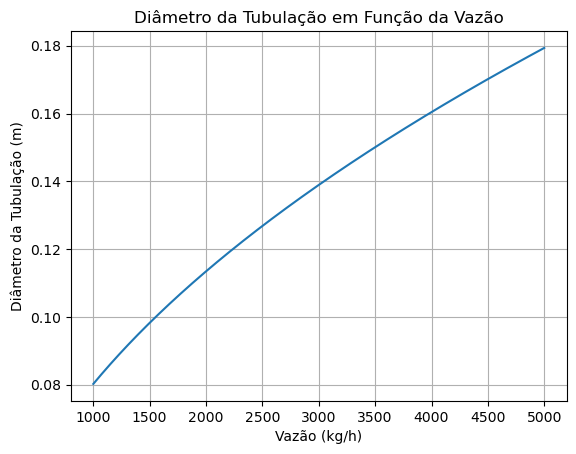

In [1]:
from docx import Document
from docx.shared import Pt
import matplotlib.pyplot as plt
import numpy as np
import math
from docx.shared import Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.section import WD_SECTION
from docx.oxml.ns import nsdecls
from docx.oxml import parse_xml

# Função para calcular o diâmetro da tubulação para múltiplos ramos VAPOR
def calcular_diametro(vazoes, volume_especifico, velocidade_vapor):
    soma_vazoes = sum(vazoes)
    diametro = math.sqrt((4 / (3.14)) * soma_vazoes * volume_especifico / (3600 * velocidade_vapor))
    return diametro

# Definir os valores fornecidos para cada ramo
ramos = [
    {"nome": "Ramo 1", "vazoes": [5000]},
    {"nome": "Ramo 2", "vazoes": [10000]},
    {"nome": "Ramo32", "vazoes": [20000]},
     {"nome": "Ramo 1", "vazoes": [5000]},
]

# Velocidade do vapor em m/s
velocidade_vapor = 15  

# Volume específico do vapor em m^3/kg
volume_especifico = 0.272764  

# Criar um novo documento .docx
doc = Document()

# Adicionar seção e obter o cabeçalho
secao = doc.sections[0]
cabecalho = secao.header

# Adicionar parágrafo ao cabeçalho
paragrafo = cabecalho.add_paragraph()
paragrafo.alignment = WD_ALIGN_PARAGRAPH.LEFT
paragrafo.text = "Cabeçalho"

# Adicionar a imagem JPEG ao cabeçalho
paragrafo.runs[0].add_picture('logo.jpeg', width=Inches(2.0))

# Adicionar título
doc.add_heading('Relatório de Tubulação de Vapor', level=1)

# Adicionar tabela com as informações dos ramos
tabela = doc.add_table(rows=1, cols=3)
cabecalho = tabela.rows[0].cells
cabecalho[0].text = 'Ramo'
cabecalho[1].text = 'Vazões (kg/h)'
cabecalho[2].text = 'Diâmetro necessário (m)'

# Calcular o diâmetro da tubulação para cada ramo e preencher a tabela
for ramo in ramos:
    nome = ramo["nome"]
    vazoes = ramo["vazoes"]
    diametro = calcular_diametro(vazoes, volume_especifico, velocidade_vapor)
    row = tabela.add_row().cells
    row[0].text = nome
    row[1].text = ', '.join(map(str, vazoes))
    row[2].text = f'{diametro:.2f}'

# Gerar dados para o gráfico (variando a vazão)
vazoes = np.linspace(1000,5000, 10000, 20000)
diametros = [calcular_diametro([v], volume_especifico, velocidade_vapor) for v in vazoes]

# Criar o gráfico
plt.plot(vazoes, diametros)
plt.xlabel('Vazão (kg/h)')
plt.ylabel('Diâmetro da Tubulação (m)')
plt.title('Diâmetro da Tubulação em Função da Vazão')
plt.grid(True)

# Salvar o gráfico como uma imagem temporária
plt.savefig('temp_plot.png')

# Adicionar parágrafo com o gráfico ao documento .docx
doc.add_paragraph("A seguir, o gráfico mostra a relação entre a vazão de vapor e o diâmetro da tubulação:")
doc.add_picture('temp_plot.png', width=Pt(400))

# Salvar o documento
doc.save('relatorio_tubulacao_vapor.docx')

print("Arquivo 'relatorio_tubulacao_vapor.docx' criado com sucesso!")